# **Downloading Dataset From Kagglehub**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rkiattisak/salaly-prediction-for-beginer")

print("Path to dataset files:", path)

100%|██████████| 3.20k/3.20k [00:00<00:00, 5.64MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rkiattisak/salaly-prediction-for-beginer/versions/1


# **IMPORTING THE DOWNLOADED DATASET AND CREATING A DATAFRAME**

In [8]:
import pandas as pd
import os

# The path to the dataset is already printed in the previous cell's output
# Assuming the dataset is in a CSV file within the downloaded directory
# List files in the directory to find the CSV file name
dataset_path = "/root/.cache/kagglehub/datasets/rkiattisak/salaly-prediction-for-beginer/versions/1"
file_list = os.listdir(dataset_path)
print("Files in the dataset directory:", file_list)

# Assuming there is only one CSV file, or the main data file is the first one
csv_file_path = os.path.join(dataset_path, file_list[0])

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame
display(df.head())

Files in the dataset directory: ['Salary Data.csv']


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [9]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

# **ANALYZING DATA**

In [10]:
df.info()
df.isnull().sum()
df['Education Level'].unique()
df['Job Title'].unique()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

# **DATA PREPROCESSING**

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Drop rows with missing values
df.dropna(inplace=True)

# Drop Gender (not required)
df.drop(columns=['Gender'], inplace=True)

# Label Encode 'Education Level' and 'Job Title'
le_edu = LabelEncoder()
df['Education_Level_Encoded'] = le_edu.fit_transform(df['Education Level'])

le_job = LabelEncoder()
df['Job_Title_Encoded'] = le_job.fit_transform(df['Job Title'])

# Final features
features = df[['Years of Experience', 'Education_Level_Encoded', 'Job_Title_Encoded']]
target = df['Salary']

# Show head
df.head()


,Age,Education Level,Job Title,Years of Experience,Salary,Education_Level_Encoded,Job_Title_Encoded
0,32.0,Bachelor's,Software Engineer,5.0,90000.0,0,159
1,28.0,Master's,Data Analyst,3.0,65000.0,1,17
2,45.0,PhD,Senior Manager,15.0,150000.0,2,130
3,36.0,Bachelor's,Sales Associate,7.0,60000.0,0,101
4,52.0,Master's,Director,20.0,200000.0,1,22


# **IMPLEMENTING MODELS AND CHECKING THEIR EVALUATION**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"📊 {name}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print("-" * 40)

# Evaluate both
evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


📊 Linear Regression
MAE: 11508.25
MSE: 255188684.52
RMSE: 15974.63
R² Score: 0.8936
----------------------------------------
📊 Random Forest
MAE: 9873.85
MSE: 193135734.42
RMSE: 13897.33
R² Score: 0.9194
----------------------------------------


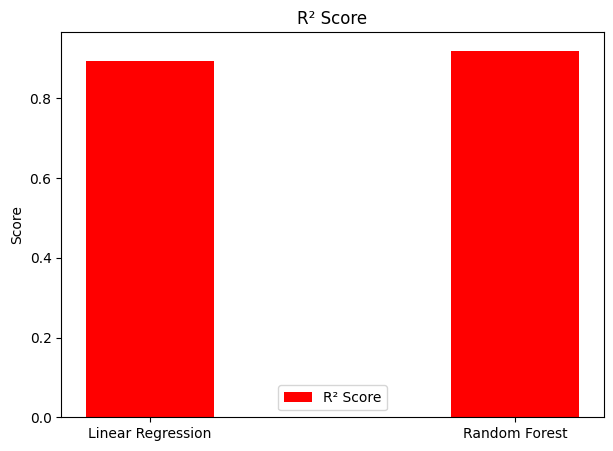

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluation metrics from the previous output
models = ['Linear Regression', 'Random Forest']
mae_scores = [11508.25, 9873.85]
mse_scores = [255188684.52, 193135734.42]
rmse_scores = [15974.63, 13897.33]
r2_scores = [0.8936, 0.9194]

x = np.arange(len(models)) # the label locations
width = 0.35 # the width of the bars

# R2 bar chart
fig4, ax4 = plt.subplots(figsize=(7, 5))
rects4 = ax4.bar(x, r2_scores, width, label='R² Score', color='red')
ax4.set_ylabel('Score')
ax4.set_title('R² Score')
ax4.set_xticks(x)
ax4.set_xticklabels(models)
ax4.legend()
plt.show()

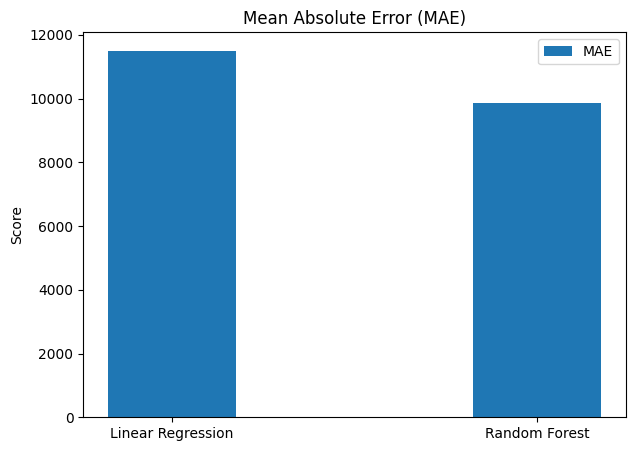

In [4]:

# MAE bar chart
fig1, ax1 = plt.subplots(figsize=(7, 5))
rects1 = ax1.bar(x, mae_scores, width, label='MAE')
ax1.set_ylabel('Score')
ax1.set_title('Mean Absolute Error (MAE)')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
plt.show()


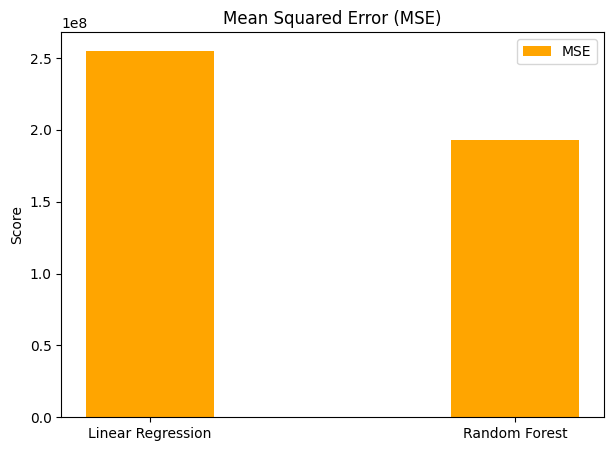

In [5]:
# MSE bar chart
fig2, ax2 = plt.subplots(figsize=(7, 5))
rects2 = ax2.bar(x, mse_scores, width, label='MSE', color='orange')
ax2.set_ylabel('Score')
ax2.set_title('Mean Squared Error (MSE)')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()
plt.show()


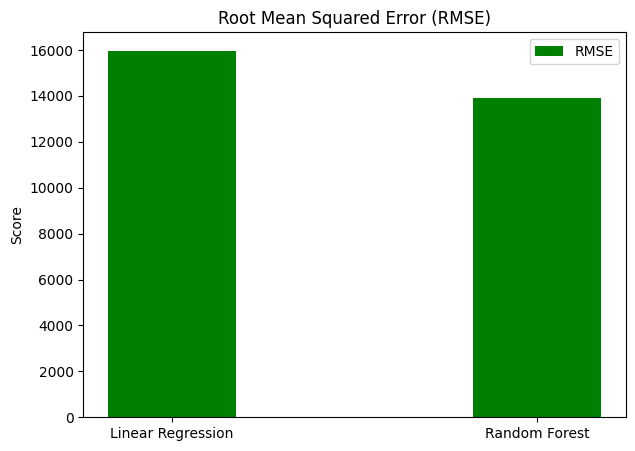

In [6]:

# RMSE bar chart
fig3, ax3 = plt.subplots(figsize=(7, 5))
rects3 = ax3.bar(x, rmse_scores, width, label='RMSE', color='green')
ax3.set_ylabel('Score')
ax3.set_title('Root Mean Squared Error (RMSE)')
ax3.set_xticks(x)
ax3.set_xticklabels(models)
ax3.legend()
plt.show()

# **Importing Libraries & Spliting Data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Feature and Target
X = df[['YearsExperience']]
y = df['Salary']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **SAVING THE BEST PERFORMANCE MODEL (RANDOM FOREST)**

In [13]:
import pickle

# Save Random Forest Model
with open('salary_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [14]:
from google.colab import files
files.download('salary_model.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>